## Training a fast thermal equilibration harmonic protocol with variable stiffness $\kappa(t)$ as a polynomial function of time
$$
U(x,t) = \frac{1}{2} \kappa(t) x^2
$$
with
$$
\kappa(t) = \kappa_i + s (\kappa_f - \kappa_i) + s(1-s) P(s)
$$
with $P(s)$ a polynomial of $s=t/t_f$

In [3]:
import torch
import numpy as np
from langesim_optim import Simulator, VariableStiffnessHarmonicForcePolynomial, loss_fn_k, loss_fn_control_k_vars, device
from langesim_optim import train_loop, train_loop_snapshots, plot_test_hist, plot_protocols
import matplotlib.pyplot as plt


In [4]:
device

'cuda'

In [6]:
ki = 0.5
kf = 1.0
tf = 1.0/30.0
dt = 0.0001
tot_steps = int(tf / dt) 
tot_sims = 100_000
lr = 10_000.0
epochs = 60
snapshot_step = 10

yrange=(-0.1, 18.0)
y_ticks=[0, ki, 1 ] + [5, 10, 15]
y_ticklabels=[0, "", 1, 5, 10, 15]

Here $P(s) = C$ is constant. $C$ is the only learnable parameter.

In [7]:
coef_list = [1.0]
force1 = VariableStiffnessHarmonicForcePolynomial(kappai=ki, 
                                                kappaf=kf,
                                                tf=tf,
                                                coef_list=coef_list,
                                                continuous=True,
                                                normalized=True)
sim1 = Simulator(dt=dt, tot_steps=tot_steps, force=force1, device=device)
optimizer1 = torch.optim.SGD(params=sim1.parameters(), lr=lr)

Epoch=0     | loss=1.23236123E-02
Epoch=1     | loss=1.06166620E-02
Epoch=2     | loss=1.01109315E-02
Epoch=3     | loss=8.73090234E-03
Epoch=4     | loss=7.77766760E-03
Epoch=5     | loss=6.90113194E-03
Epoch=6     | loss=6.25170628E-03
Epoch=7     | loss=5.24943741E-03
Epoch=8     | loss=4.74712206E-03
Epoch=9     | loss=3.96212004E-03
Epoch=10    | loss=3.76209617E-03
Epoch=11    | loss=3.18171317E-03
Epoch=12    | loss=2.56911106E-03
Epoch=13    | loss=2.47993344E-03
Epoch=14    | loss=2.15108925E-03
Epoch=15    | loss=1.73946493E-03
Epoch=16    | loss=1.70611963E-03
Epoch=17    | loss=1.32175488E-03
Epoch=18    | loss=1.14537496E-03
Epoch=19    | loss=9.20796709E-04
Epoch=20    | loss=8.91966280E-04
Epoch=21    | loss=7.83327618E-04
Epoch=22    | loss=6.56410470E-04
Epoch=23    | loss=6.28589070E-04
Epoch=24    | loss=4.57235961E-04
Epoch=25    | loss=4.18233016E-04
Epoch=26    | loss=3.01045482E-04
Epoch=27    | loss=2.88689655E-04
Epoch=28    | loss=2.43158662E-04
Epoch=29    | 

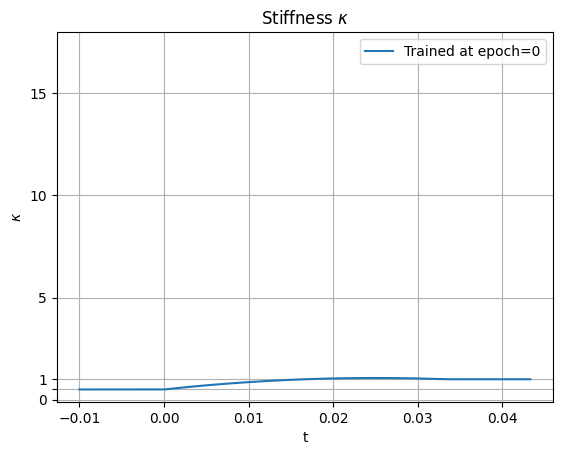

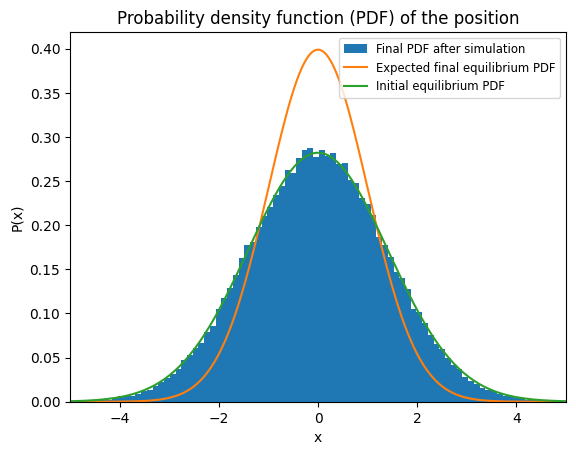

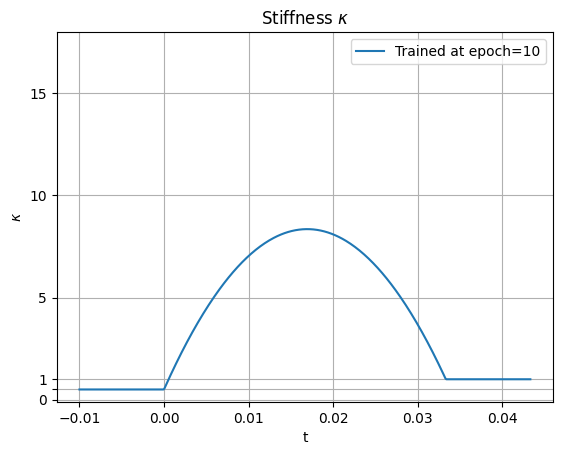

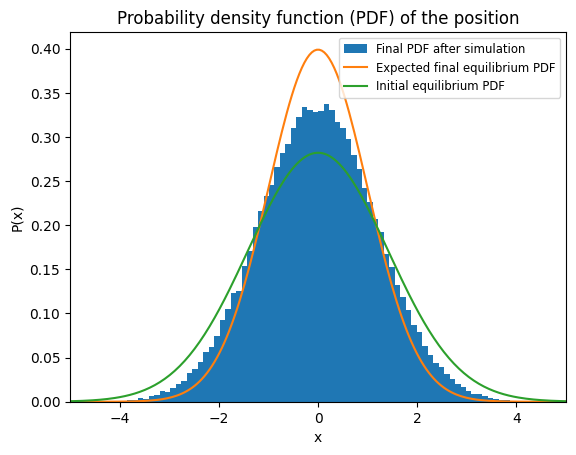

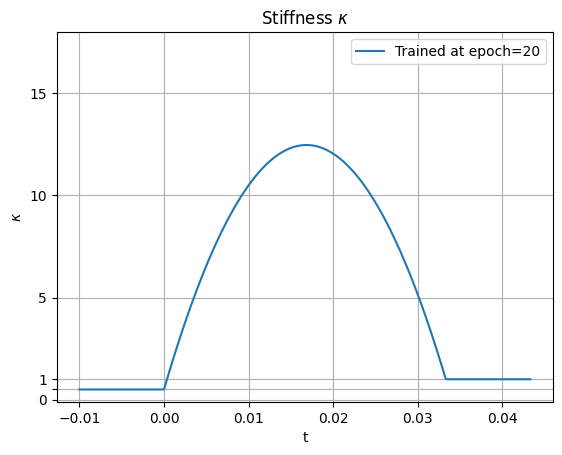

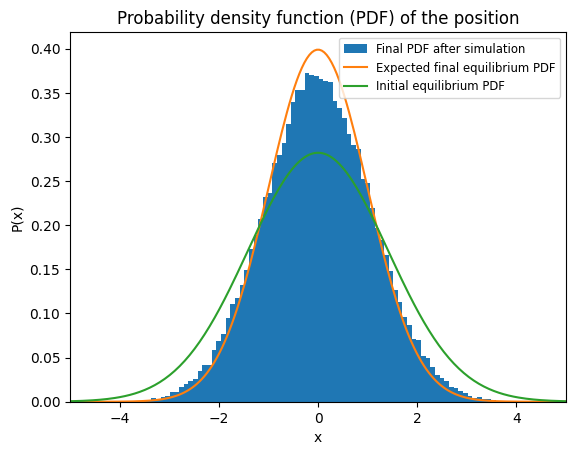

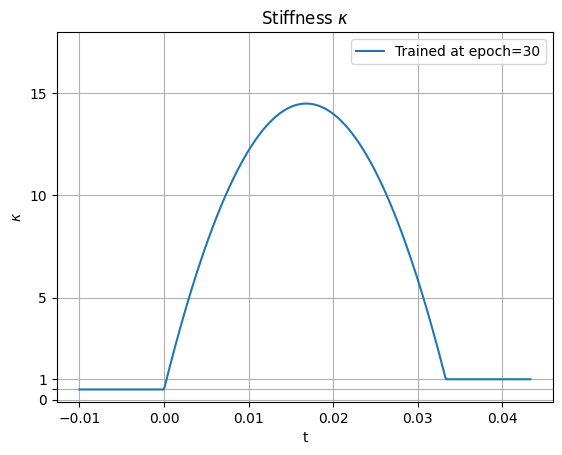

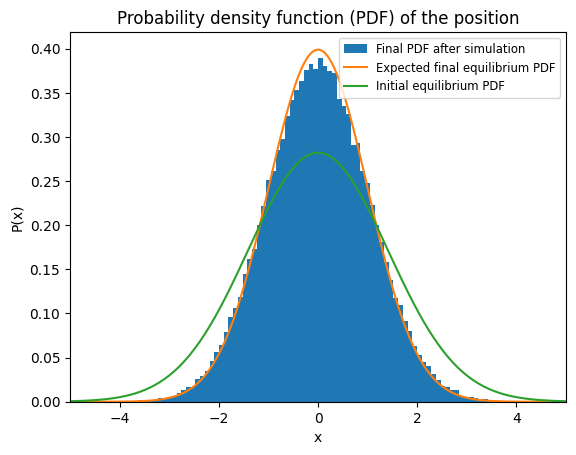

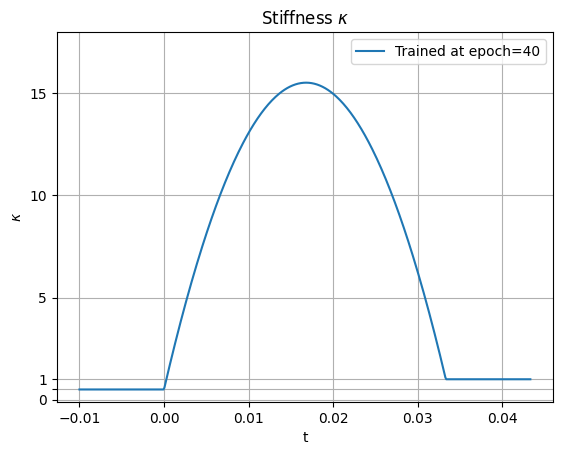

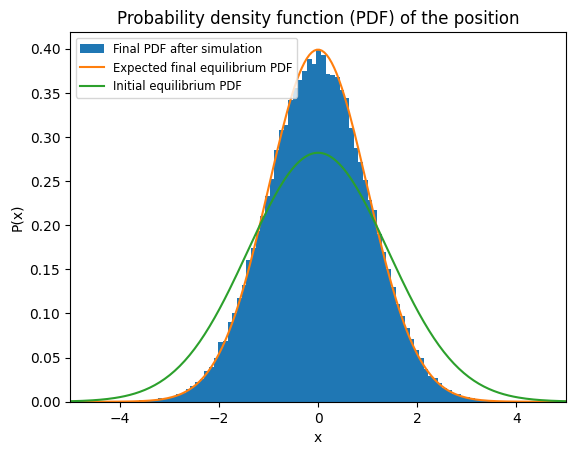

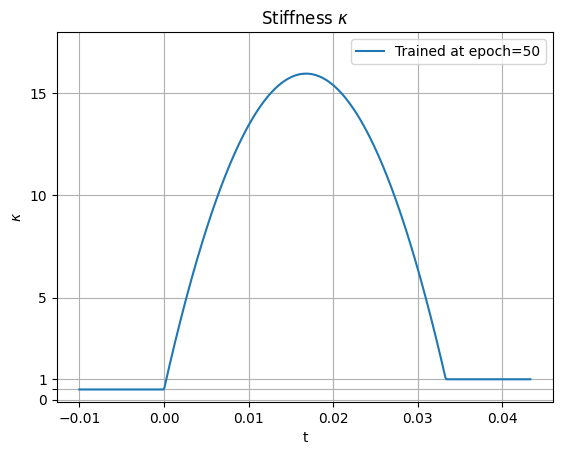

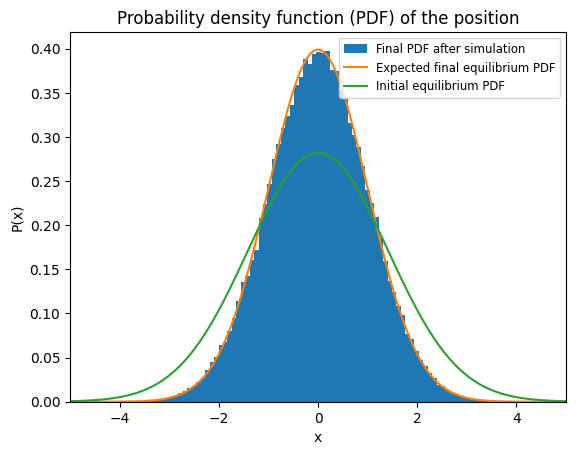

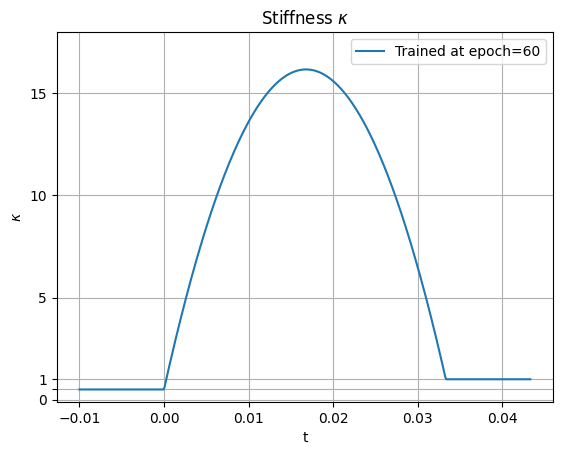

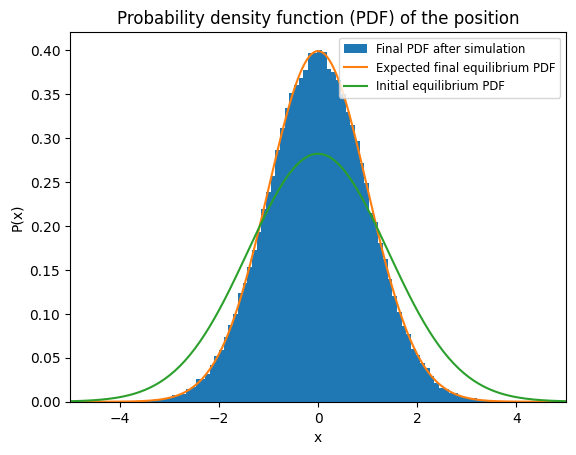

In [8]:
lossl1, protocols1, plots1 = train_loop_snapshots(epochs=epochs, 
                                                sim=sim1,
                                                tot_sims=tot_sims,
                                                ki=ki, 
                                                kf=kf,
                                                tf=tf,
                                                optimizer=optimizer1, 
                                                loss_fn=loss_fn_k,
                                                scheduler=None,
                                                device=device,
                                                snapshot_step=snapshot_step,
                                                xrange=5.0,
                                                bins=100,
                                                times=np.linspace(-0.01, tf+0.01, 500),
                                                yrange=yrange,
                                                y_ticks=y_ticks,
                                                y_ticklabels=y_ticklabels,
                                                )

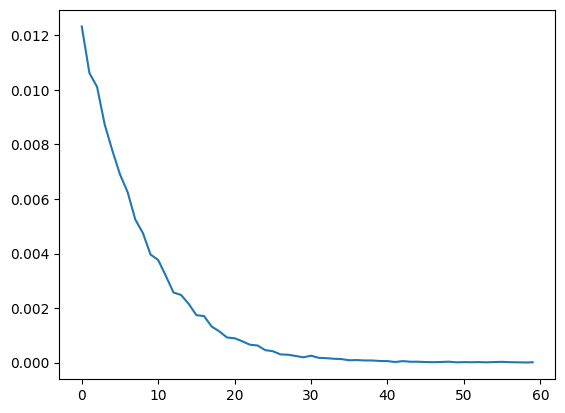

In [9]:
plt.plot(lossl1)

Now let's train a protocol with 3 parameters:
$
P(s) = a_0 + a_1 s + a_2 s^2
$

In [10]:
coef_list2 = [1.0, 1.0, 1.0] # initial values for the 3 parameters.
force2 = VariableStiffnessHarmonicForcePolynomial(kappai=ki, 
                                                kappaf=kf,
                                                tf=tf,
                                                coef_list=coef_list2,
                                                continuous=True,
                                                normalized=True)
sim2 = Simulator(dt=dt, tot_steps=tot_steps, force=force2, device=device)
optimizer2 = torch.optim.SGD(params=sim2.parameters(), lr=lr)

Epoch=0     | loss=1.19473161E-02
Epoch=1     | loss=1.04170693E-02
Epoch=2     | loss=8.83542374E-03
Epoch=3     | loss=7.58554693E-03
Epoch=4     | loss=6.15459494E-03
Epoch=5     | loss=5.09469490E-03
Epoch=6     | loss=4.44757473E-03
Epoch=7     | loss=3.76196671E-03
Epoch=8     | loss=3.23535083E-03
Epoch=9     | loss=2.66182446E-03
Epoch=10    | loss=2.20758026E-03
Epoch=11    | loss=1.77882344E-03
Epoch=12    | loss=1.44594535E-03
Epoch=13    | loss=1.26882340E-03
Epoch=14    | loss=1.04497699E-03
Epoch=15    | loss=7.37223134E-04
Epoch=16    | loss=5.21269627E-04
Epoch=17    | loss=5.25999931E-04
Epoch=18    | loss=5.21412643E-04
Epoch=19    | loss=3.89998313E-04
Epoch=20    | loss=2.84304988E-04
Epoch=21    | loss=2.36580119E-04
Epoch=22    | loss=1.79052382E-04
Epoch=23    | loss=1.85034209E-04
Epoch=24    | loss=1.03674865E-04
Epoch=25    | loss=9.48898669E-05
Epoch=26    | loss=8.63272144E-05
Epoch=27    | loss=5.75410959E-05
Epoch=28    | loss=4.14165661E-05
Epoch=29    | 

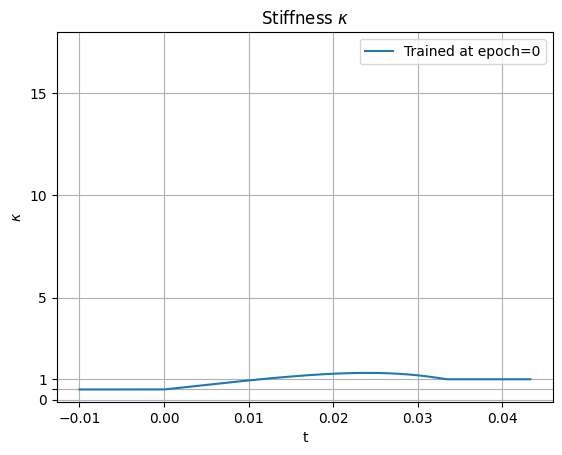

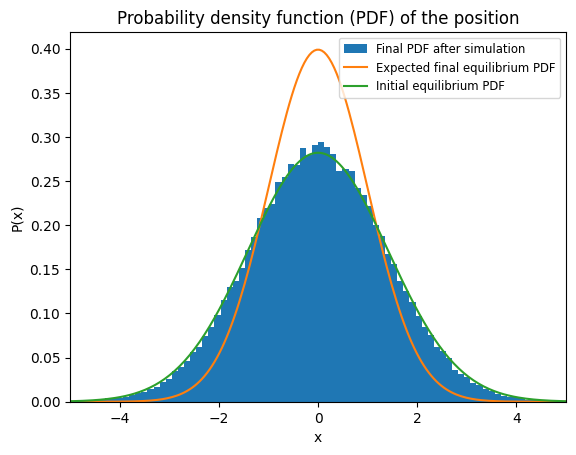

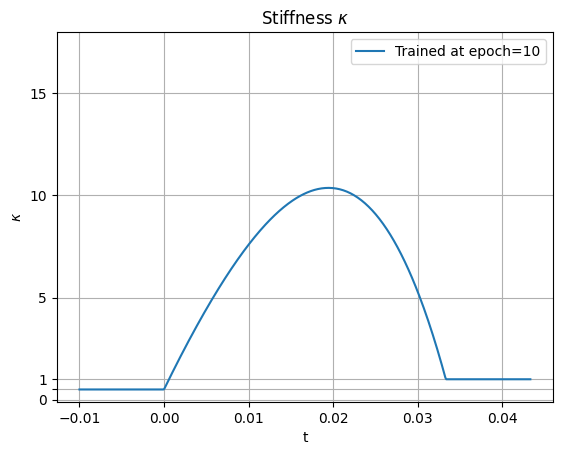

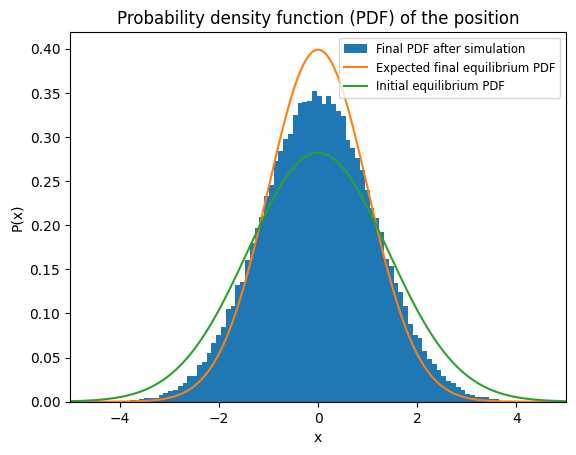

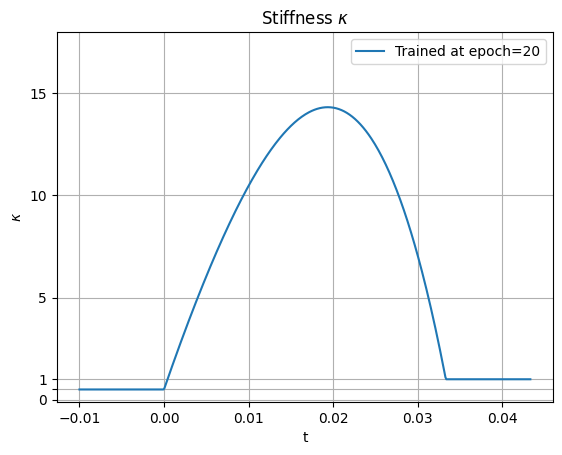

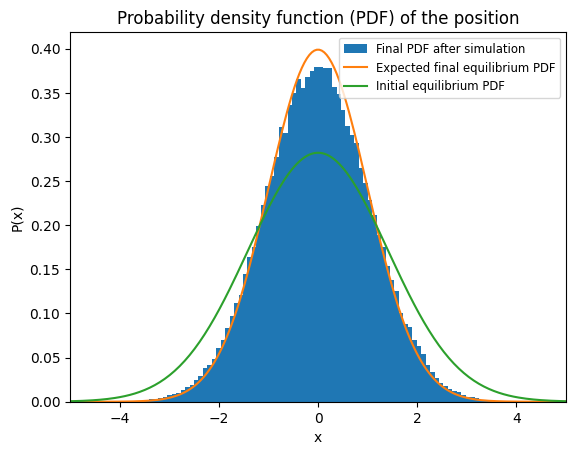

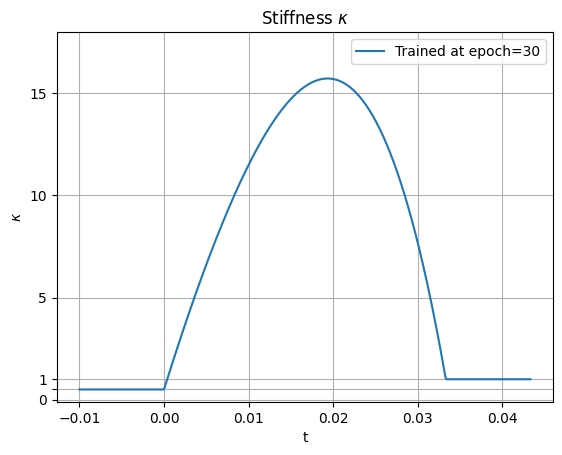

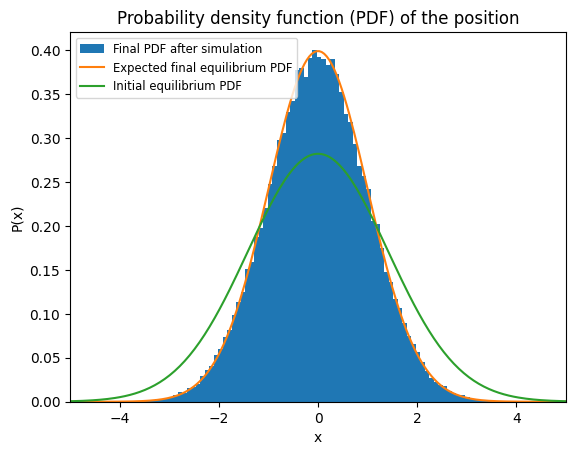

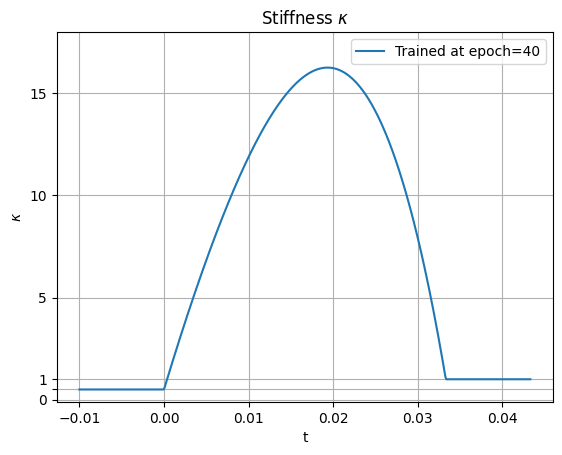

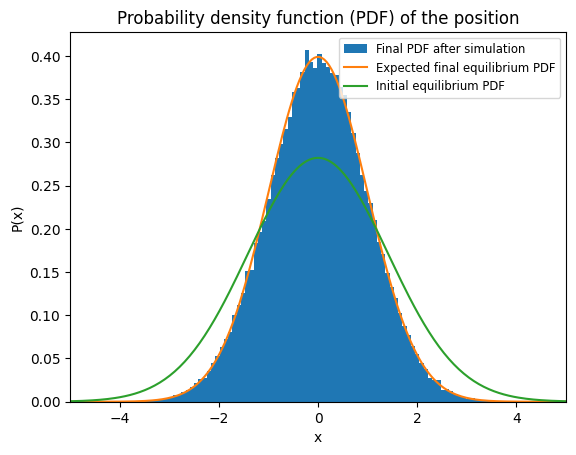

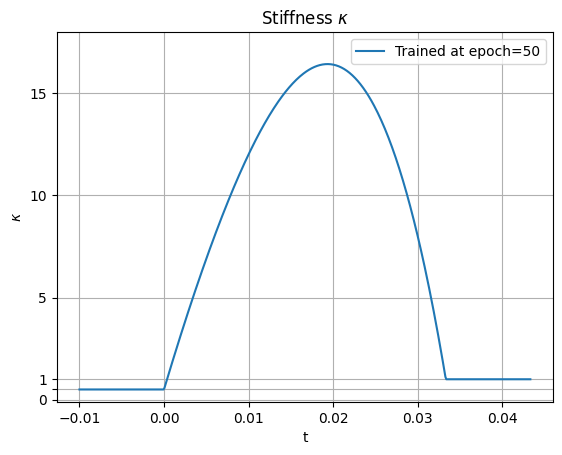

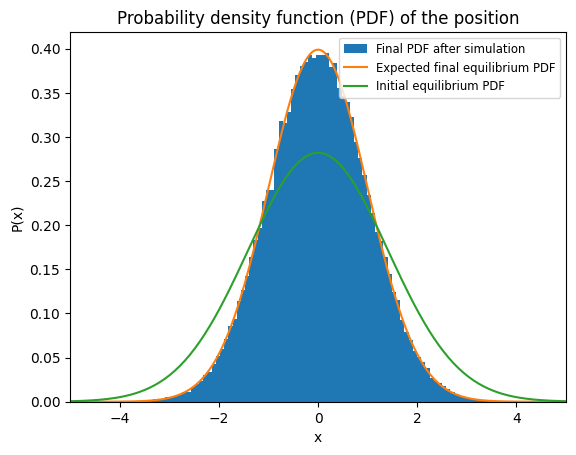

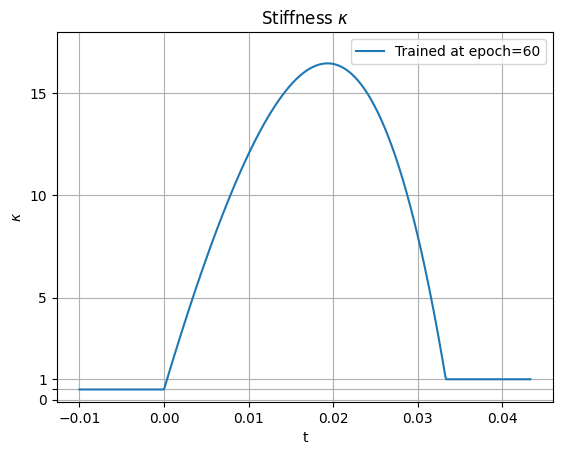

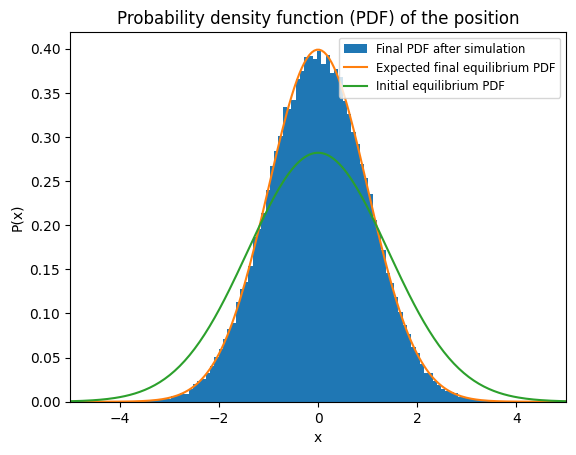

In [11]:
lossl2, protocols2, plots2 = train_loop_snapshots(epochs=epochs, 
                                                sim=sim2,
                                                tot_sims=tot_sims,
                                                ki=ki, 
                                                kf=kf,
                                                tf=tf,
                                                optimizer=optimizer2, 
                                                loss_fn=loss_fn_k,
                                                scheduler=None,
                                                device=device,
                                                snapshot_step=snapshot_step,
                                                xrange=5.0,
                                                bins=100,
                                                times=np.linspace(-0.01, tf+0.01, 500),
                                                yrange=yrange,
                                                y_ticks=y_ticks,
                                                y_ticklabels=y_ticklabels,
                                                )

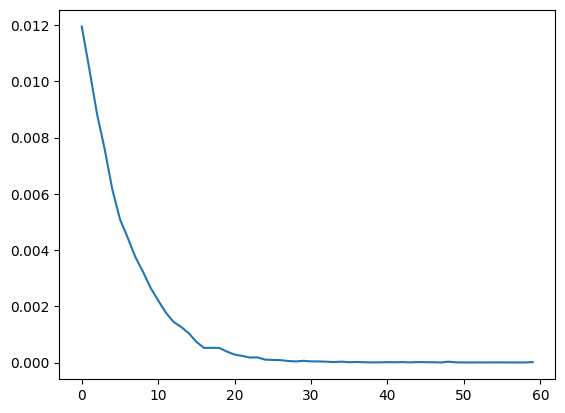

In [12]:
plt.plot(lossl2)

### Plot both protocols for comparison

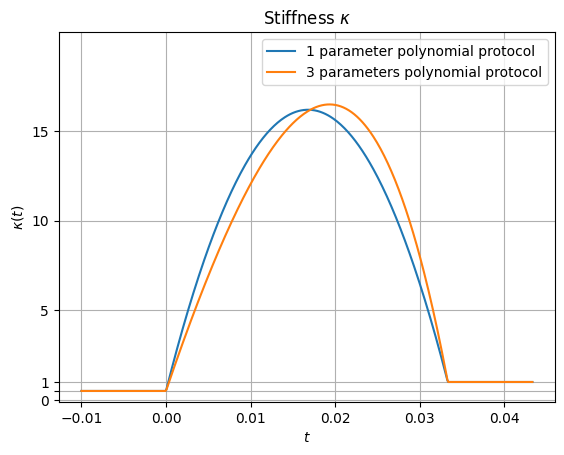

In [14]:
times = np.linspace(-0.01, tf+0.01, 500)
kappa1 = np.array([sim1.force.kappa(t).item() for t in times])
kappa2 = np.array([sim2.force.kappa(t).item() for t in times])

fig = plt.figure()
plt.plot(times, kappa1, label="1 parameter polynomial protocol")
plt.plot(times, kappa2, label="3 parameters polynomial protocol")

yrange = (-0.1, 20.5)
plt.ylim(yrange)
plt.xlabel("$t$")
plt.ylabel(r"$\kappa(t)$")
plt.title("Stiffness $\kappa$")
plt.legend()
plt.grid(True)
plt.yticks(y_ticks)
plt.gca().set_yticklabels(y_ticklabels)
# Adjust legend position
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place outside, top right
plt.legend(loc='upper right')  # Place inside
# Show plot
# plt.tight_layout() # Adjust layout to prevent clipping
plt.show()

In [16]:
fig.savefig("kappa_polynomial.pdf")